In [1]:
import torch
import torchvision

C:\Users\maxsa\anaconda3\envs\dl\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\maxsa\anaconda3\envs\dl\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
batch_size = 8
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./dataset/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./dataset/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

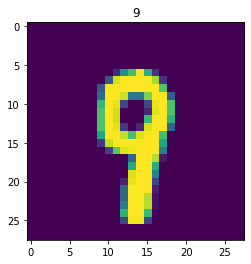

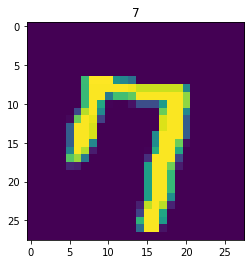

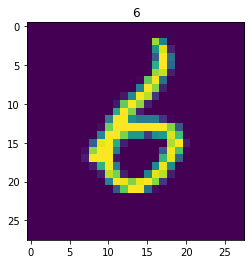

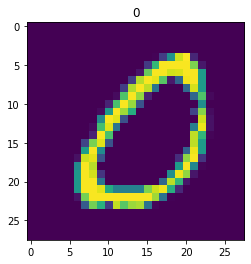

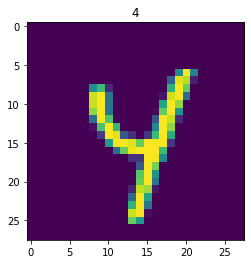

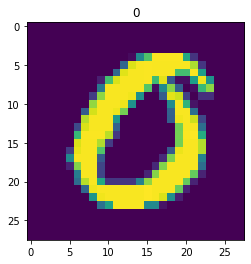

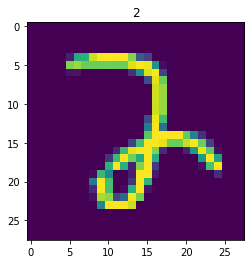

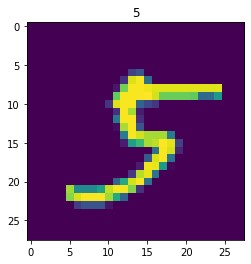

In [3]:
import matplotlib.pyplot as plt
import ipdb

for batch_id, (data) in enumerate(train_loader):

    x,y = data[0], data[1]
    for i in range(batch_size):
        plt.imshow(x[i,0,:])
        plt.title(y[i].item())
        plt.show()
    break

In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl

class autoencoder(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, padding=1)  
        self.conv2 = nn.Conv2d(4, 4*2, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
       
        self.t_conv1 = nn.ConvTranspose2d(4*2, 4, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(4, 1, 2, stride=2)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
              
        return x
    
    def configure_optimizers(self):
        
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer
    
    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        out = F.relu(self.conv1(x))
        out =  self.pool(out)
        out =  F.relu(self.conv2(out))
        out =  self.pool(out)
        out =  F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        loss = F.mse_loss(out, x )
        self.log('train_loss', loss)
        return  loss
    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        out = F.relu(self.conv1(x))
        out =  self.pool(out)
        out =  F.relu(self.conv2(out))
        out =  self.pool(out)
        out =  F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        loss = F.mse_loss(out, x )
        self.log('valid_loss', loss)
        return  loss

        

In [ ]:
dataset = MNIST('', train=True, download=True, transform=transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000, 5000])
train_loader = DataLoader(mnist_train,num_workers=4, batch_size=64)
val_loader = DataLoader(mnist_val,num_workers=4, batch_size=64)
# model
model =autoencoder()

trainer = pl.Trainer(gpus=1)
trainer.fit(model, train_loader, val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type            | Params
--------------------------------------------
0 | conv1   | Conv2d          | 40    
1 | conv2   | Conv2d          | 296   
2 | pool    | MaxPool2d       | 0     
3 | t_conv1 | ConvTranspose2d | 132   
4 | t_conv2 | ConvTranspose2d | 17    
--------------------------------------------
485       Trainable params
0         Non-trainable params
485       Total params
0.002     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]